In [1]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

# Data Preparation

In [2]:
data = pd.read_csv('./data/train_dst.csv')

In [3]:
def generate_batches(a, b, c, d, y, n):
    '''
    Function creates batches out of a, b, c, d data of size 8 hours,
    8-hour window is moved throughout the arrays with step one hour,
    Than all the 8-hour batches are concatenated together to create one big 32 size batch.
    Finally appended to main array.
    
    Also cuts first 8 hours out of y data, so that for every 8 hours of x data
    there is one hour of y data hour ahead of input neurons data. 
    
    Parameters
    ----------
    a - Bz
    b - Sigma Bz
    c - n
    d = v
    y - y training data (DST)
    n - length of event

    Returns
    -------
    batches - Matrix where rows correspond to 8 hours of x array data
          y - y training data (DST) that has first 8 hours cut off
    '''

    y = y[8:]
    y = torch.from_numpy(np.array(y))
    print(y.size())
    print(n)

    batches = []

    for i in range(n):
        if (i+8) <= n:
            # print(i, i+8)
            batch_a = a[i:i+8]
            batch_b = b[i:i+8]
            batch_c = c[i:i+8]
            batch_d = d[i:i+8]

            final_batch = np.concatenate((batch_a, batch_b, batch_c, batch_d), axis=None)

            batches.append(final_batch)

    batches = batches[:-1]
    batches = torch.from_numpy(np.array(batches))

    return batches, y

In [4]:
x_train_batches = []
y_train_batches = []

for i in range(0, len(data), 147):
    Bz       = torch.from_numpy(data.loc[i:i+146]['Bz_GSE'][:-1].to_numpy())
    Bz_sigma = torch.from_numpy(data.loc[i:i+146]['Sigma_Bz_GSE'][:-1].to_numpy())
    n        = torch.from_numpy(data.loc[i:i+146]['Proton_density'][:-1].to_numpy())
    v        = torch.from_numpy(data.loc[i:i+146]['Plasma_speed'][:-1].to_numpy())
    DST      = torch.from_numpy(data.loc[i:i+146]['Dst_index'][:-1].to_numpy())

    x_train, y_train = generate_batches(Bz, Bz_sigma, n, v, DST, 146)

    y_train_batches.append(y_train)
    x_train_batches.append(x_train)

x_train_batches[0].shape, y_train_batches[0].shape, len(x_train_batches), len(y_train_batches)

torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size([138])
146
torch.Size

(torch.Size([138, 32]), torch.Size([138]), 60, 60)

# NN Traning

In [5]:
model = nn.Sequential(
    nn.Linear(32, 26),
    nn.Tanh(),
    nn.Linear(26,1),
)

In [1]:
def TrainNN(model, x, y, loss_fn, n_epochs, alpha):
    curr_loss = None
    history = []
    optim = torch.optim.Adam(model.parameters(), lr=alpha)
    
    for i in range(n_epochs):
        model.train()
        for x_batch, y_batch in zip(x, y): 
            for batch, y_real in zip(x_batch, y_batch):
        
                batch = batch.to(torch.float32)
                y_real = y_real.to(torch.float32)
        
                y_pred  = model(batch)
                loss    = loss_fn(y_pred, y_real)
                curr_loss = loss
        
                optim.zero_grad()
                loss.backward()
        
                optim.step()
    
        print(f"epoch n: {i+1}, Loss: {curr_loss}")
        history.append(curr_loss)
        
    return history

In [7]:
_ = TrainNN(model, 
        x_train_batches, y_train_batches,
        nn.MSELoss(),  
        n_epochs=40,
        alpha=0.0001,
)

C:\Users\Lukas\anaconda3\envs\space_lab\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch n: 1, Loss: 0.003160304157063365
epoch n: 2, Loss: 0.003474622033536434
epoch n: 3, Loss: 0.0036871549673378468
epoch n: 4, Loss: 0.0037975639570504427
epoch n: 5, Loss: 0.003932504914700985
epoch n: 6, Loss: 0.004048497881740332
epoch n: 7, Loss: 0.0040965317748487
epoch n: 8, Loss: 0.004133142996579409
epoch n: 9, Loss: 0.00414313143119216
epoch n: 10, Loss: 0.004100877791643143
epoch n: 11, Loss: 0.004013393074274063
epoch n: 12, Loss: 0.003917784430086613
epoch n: 13, Loss: 0.0038049009162932634
epoch n: 14, Loss: 0.003710859687998891
epoch n: 15, Loss: 0.003605114296078682
epoch n: 16, Loss: 0.0034367574844509363
epoch n: 17, Loss: 0.0032349119428545237
epoch n: 18, Loss: 0.003066501347348094
epoch n: 19, Loss: 0.002908650552853942
epoch n: 20, Loss: 0.0027411887422204018
epoch n: 21, Loss: 0.0026298018638044596
epoch n: 22, Loss: 0.0025903424248099327
epoch n: 23, Loss: 0.0024780924431979656
epoch n: 24, Loss: 0.0023950436152517796
epoch n: 25, Loss: 0.002322430955246091
ep

In [8]:
def PredictEvent(model, ev_num, events):
    model.eval()
    
    x, y = events
    
    preds = []
    for batch in x[ev_num]:
        batch = batch.float()
        preds.append(model(batch).detach().numpy())
    preds = np.array(preds)
    
    plt.plot(preds, label='prediction')
    plt.plot(y[ev_num], label='real')
    plt.legend()
    
    
def PredictPeriod(model, period):
    model.eval()
    x, y = period
    preds = []
    
    for batch in x:
        batch = batch.float()
        preds.append(
            model(batch).detach().numpy()
        )
    
    preds = np.array(preds)

    plt.figure(figsize=(25, 5))
    plt.plot(preds, label='prediction')
    plt.plot(preds, label='real')
    plt.legend()
    
    return preds


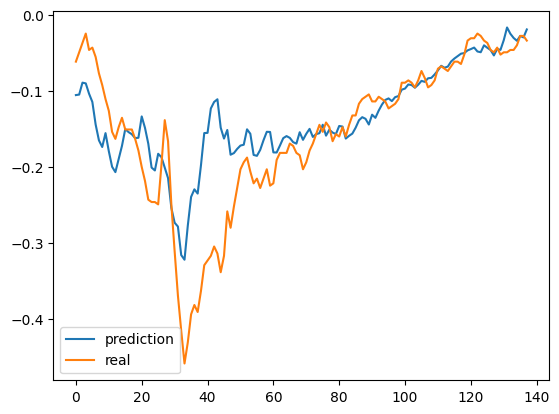

In [9]:
PredictEvent(model, 41, events=(x_train_batches, y_train_batches))

# NN Validation

In [10]:
valid_data = pd.read_csv('./data/valid_dst.csv')
valid_data.set_index('index', inplace=True)

In [11]:
def ValidationDataProcessing():
    valid_data = pd.read_csv('./data/valid_dst.csv')
    valid_data.set_index('index', inplace=True)
    valid_data.index = pd.to_datetime(valid_data.index)
    print(valid_data['Dst_index'].size)

    year_1979 = valid_data[valid_data.index.year == 1979]
    year_1980 = valid_data[valid_data.index.year == 1980]
    year_1981 = valid_data[valid_data.index.year == 1981]
    
    print(year_1979.size)

    x_valid_79, y_valid_79 = generate_batches(
        year_1979['Bz_GSE'],
        year_1979['Sigma_Bz_GSE'],
        year_1979['Proton_density'],
        year_1979['Plasma_speed'],
        year_1979['Dst_index'],
        len(year_1979)
    )

    x_valid_80, y_valid_80 = generate_batches(
        year_1980['Bz_GSE'],
        year_1980['Sigma_Bz_GSE'],
        year_1980['Proton_density'],
        year_1980['Plasma_speed'],
        year_1980['Dst_index'],
        len(year_1980)
    )

    x_valid_81, y_valid_81 = generate_batches(
        year_1981['Bz_GSE'],
        year_1981['Sigma_Bz_GSE'],
        year_1981['Proton_density'],
        year_1981['Plasma_speed'],
        year_1981['Dst_index'],
        len(year_1981)
    )

    return x_valid_79, y_valid_79, x_valid_80, y_valid_80, x_valid_81, y_valid_81

25869
41785
torch.Size([8349])
8357
torch.Size([8744])
8752
torch.Size([8752])
8760


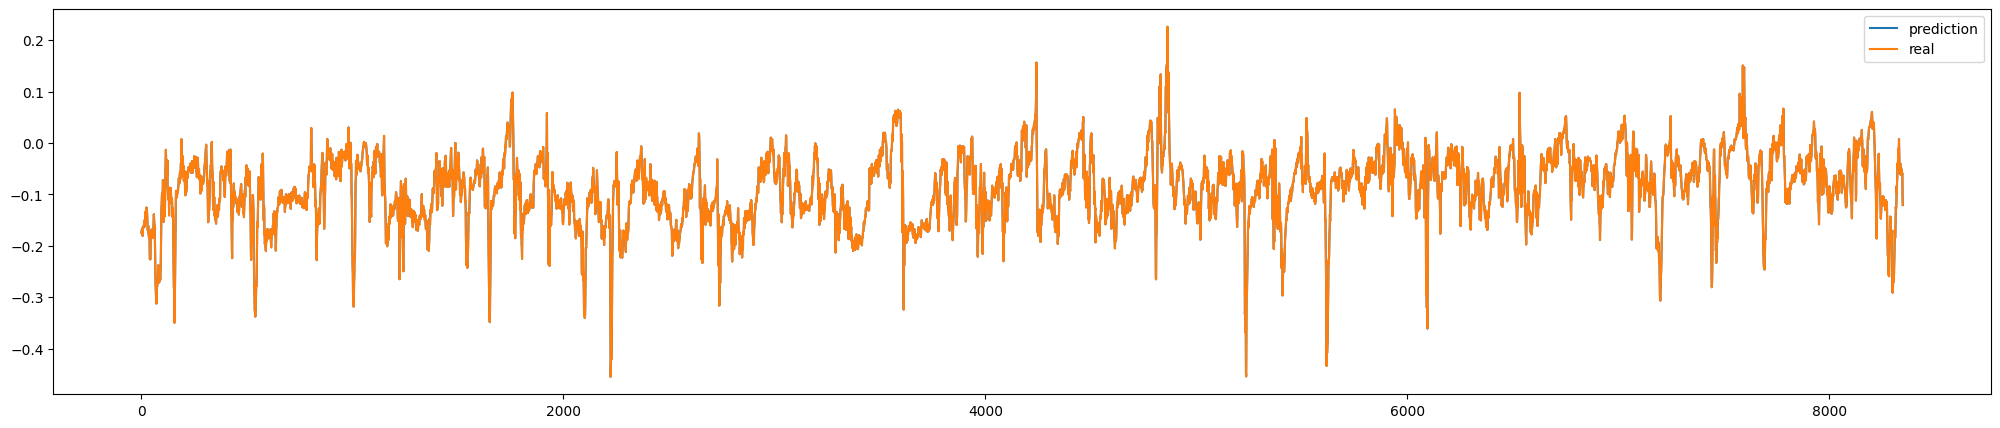

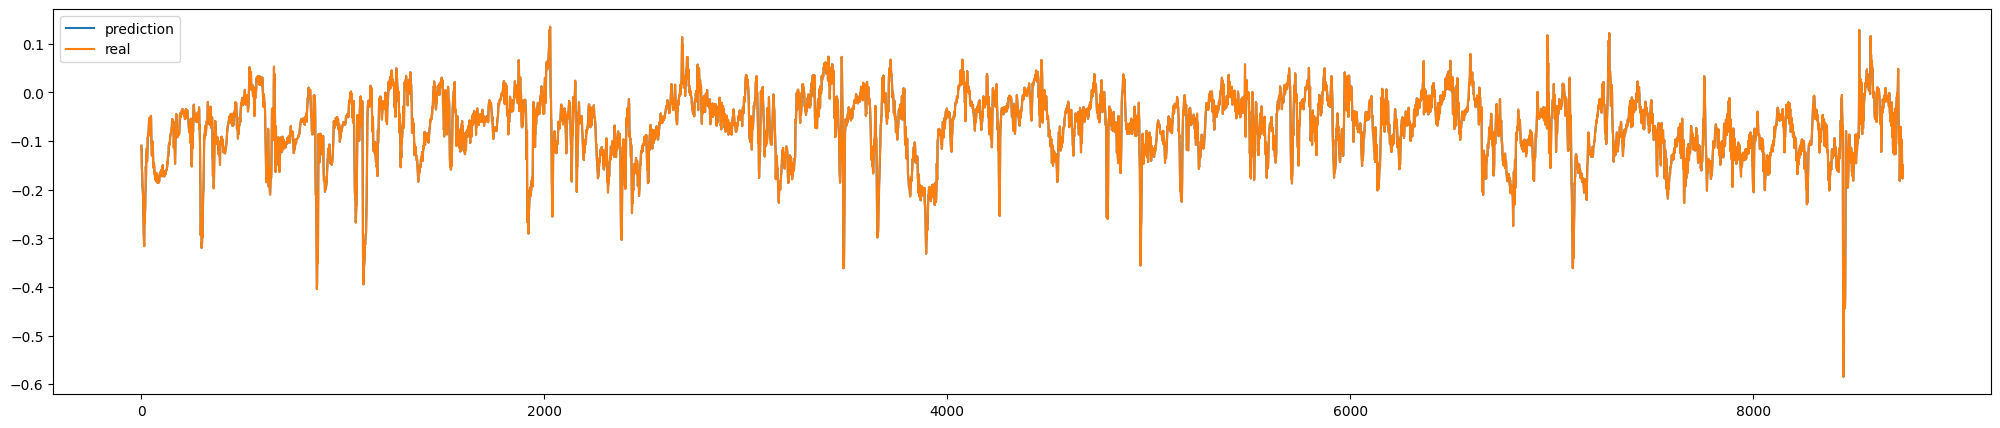

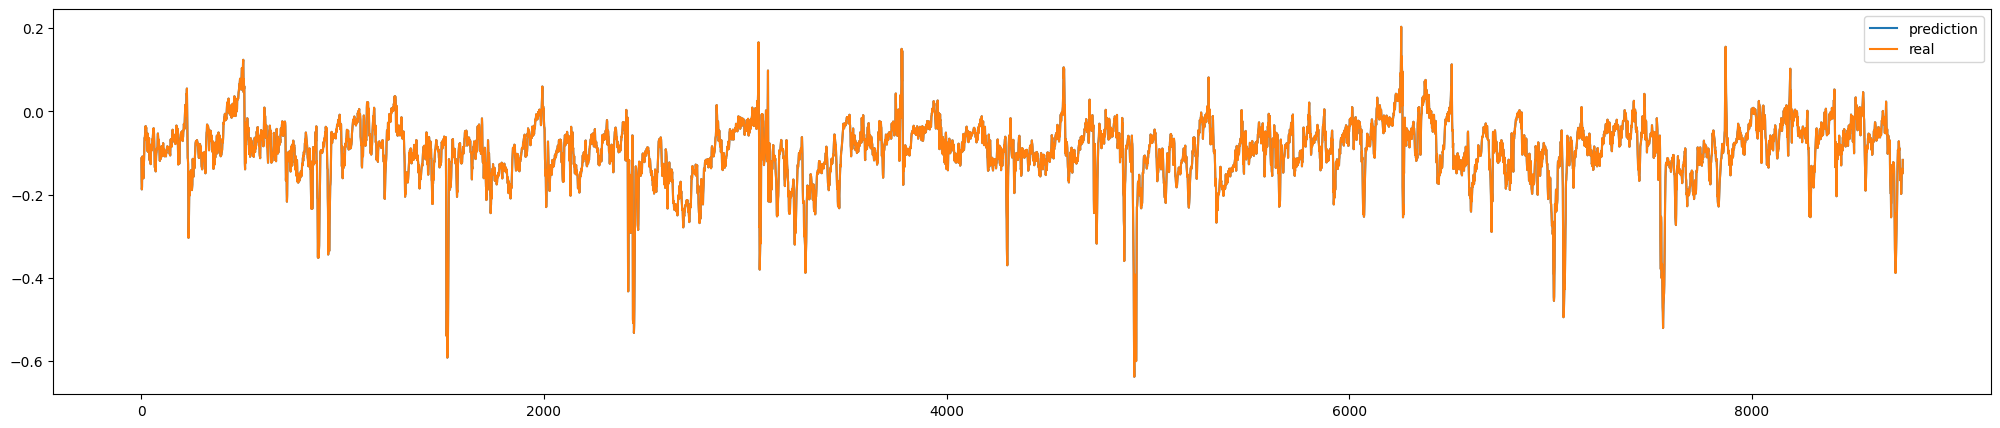

In [12]:
x_valid_79, y_valid_79, x_valid_80, y_valid_80, x_valid_81, y_valid_81 = ValidationDataProcessing()

preds_79 = PredictPeriod(model, (x_valid_79, y_valid_79))
preds_80 = PredictPeriod(model, (x_valid_80, y_valid_80))
preds_81 = PredictPeriod(model, (x_valid_81, y_valid_81))

In [30]:
Predictions = np.concatenate((preds_79, preds_80, preds_81))
Predictions = pd.DataFrame({'DST_Pred_1H': Predictions.flatten()})

In [14]:
y_valid_79.size()

torch.Size([8349])

In [15]:
valid_data.index = pd.to_datetime(valid_data.index)
valid_data['Dst_index'][valid_data.index.year == 1979].index

DatetimeIndex(['1979-01-01 00:00:00', '1979-01-01 01:00:00',
               '1979-01-01 02:00:00', '1979-01-01 03:00:00',
               '1979-01-01 04:00:00', '1979-01-01 05:00:00',
               '1979-01-01 06:00:00', '1979-01-01 07:00:00',
               '1979-01-01 08:00:00', '1979-01-01 09:00:00',
               ...
               '1979-12-31 14:00:00', '1979-12-31 15:00:00',
               '1979-12-31 16:00:00', '1979-12-31 17:00:00',
               '1979-12-31 18:00:00', '1979-12-31 19:00:00',
               '1979-12-31 20:00:00', '1979-12-31 21:00:00',
               '1979-12-31 22:00:00', '1979-12-31 23:00:00'],
              dtype='datetime64[ns]', name='index', length=8357, freq=None)

In [19]:
stripped_valid = pd.concat([
    valid_data['Dst_index'][valid_data.index.year == 1979].iloc[8:],
    valid_data['Dst_index'][valid_data.index.year == 1980].iloc[8:],
    valid_data['Dst_index'][valid_data.index.year == 1981].iloc[8:]
])
stripped_valid

index
1979-01-01 08:00:00   -0.067524
1979-01-01 09:00:00   -0.064309
1979-01-01 10:00:00   -0.064309
1979-01-01 11:00:00   -0.061093
1979-01-01 12:00:00   -0.064309
                         ...   
1981-12-31 19:00:00   -0.086817
1981-12-31 20:00:00   -0.086817
1981-12-31 21:00:00   -0.086817
1981-12-31 22:00:00   -0.083601
1981-12-31 23:00:00   -0.083601
Name: Dst_index, Length: 25845, dtype: float64

In [31]:
Predictions.index = stripped_valid.index
Predictions

,DST_Pred_1H
index,
1979-01-01 08:00:00,-0.174321
1979-01-01 09:00:00,-0.171611
1979-01-01 10:00:00,-0.167495
1979-01-01 11:00:00,-0.166445
1979-01-01 12:00:00,-0.166205
...,...
1981-12-31 19:00:00,-0.139620
1981-12-31 20:00:00,-0.137577
1981-12-31 21:00:00,-0.149712
